MLPClassifier example 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

In [2]:
import pickle
df=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/train_set_df.pickled','rb'))

In [3]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
df = df.drop(['Formation','Well Name','Depth'], axis=1)

In [5]:
df.head(50)

,Facies,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,76.89,0.615,16.9,14.220,3.5,1,0.787


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
y = df['Facies']
x = df.drop(['Facies'], axis=1)

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
scaled_features = scaler.transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,y, test_size= 0.2, random_state=27)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(20,8,10), max_iter=250, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [11]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 2.20474461
Iteration 2, loss = 2.17343206
Iteration 3, loss = 2.14059293
Iteration 4, loss = 2.11197840
Iteration 5, loss = 2.08681958
Iteration 6, loss = 2.06417789
Iteration 7, loss = 2.04377030
Iteration 8, loss = 2.02430504
Iteration 9, loss = 2.00553493
Iteration 10, loss = 1.98686421
Iteration 11, loss = 1.96818426
Iteration 12, loss = 1.94877406
Iteration 13, loss = 1.92873370
Iteration 14, loss = 1.90769235
Iteration 15, loss = 1.88563024
Iteration 16, loss = 1.86244320
Iteration 17, loss = 1.83789830
Iteration 18, loss = 1.81203289
Iteration 19, loss = 1.78544408
Iteration 20, loss = 1.75832357
Iteration 21, loss = 1.73116305
Iteration 22, loss = 1.70482545
Iteration 23, loss = 1.67863803
Iteration 24, loss = 1.65374456
Iteration 25, loss = 1.62954862
Iteration 26, loss = 1.60662255
Iteration 27, loss = 1.58495936
Iteration 28, loss = 1.56442753
Iteration 29, loss = 1.54538982
Iteration 30, loss = 1.52758426
Iteration 31, loss = 1.51145199
Iteration 32, los

/Users/zhiliwei/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
accuracy_score(y_test, y_pred)

0.6042780748663101

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 10,  32,   3,   0,   0,   0,   0,   0,   0],
       [  0, 136,  40,   1,   0,   0,   1,   0,   0],
       [  0,  46,  89,   1,   0,   1,   0,   0,   0],
       [  1,   0,   0,  27,   1,  10,   1,   0,   0],
       [  0,   0,   1,   7,   1,  34,   2,  12,   0],
       [  0,   0,   0,  10,   0,  66,   3,  37,   1],
       [  0,   0,   0,   3,   0,   1,   8,   4,   0],
       [  0,   0,   1,   3,   0,  24,   2,  98,   2],
       [  0,   0,   0,   1,   0,   0,   0,  10,  17]])

In [14]:
# sns.heatmap(cm,annot=True, center=True,fmt='d')
# plt.ylabel('True label')
# plt.xlabel('Predicted label');
# plt.show()

In [15]:
test_set_df=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/test_set_df.pickled','rb'))

In [16]:
df = test_set_df.drop(['Formation','Well Name','Depth'], axis=1)

In [17]:
y_test = df['Facies']
x_test = df.drop(['Facies'], axis=1)

In [18]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [19]:
y_pred = clf.predict(x_test_scaled)

In [20]:
accuracy_score(y_test, y_pred)

0.5461165048543689

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 67, 26,  1,  0,  0,  0,  0,  0],
       [ 0, 24, 52,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  1, 19,  0,  6,  0,  1,  0],
       [ 0,  2,  0,  4,  1, 14,  1,  7,  0],
       [ 0,  0,  2,  6,  1, 31,  1, 17,  0],
       [ 0,  0,  0,  4,  0,  1,  6,  3,  0],
       [ 0,  1,  0,  3,  0, 20,  1, 41,  2],
       [ 0,  0,  0,  2,  0,  1,  0,  8,  7]])

In [22]:
y_pred.shape

(412,)

In [23]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

conf = confusion_matrix(y_test, y_pred)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     1    25                                              26
     CSiS          67    26     1                                  94
     FSiS          24    52     1           1                      78
     SiSh                 1    19           6           1          27
       MS           2           4     1    14     1     7          29
       WS                 2     6     1    31     1    17          58
        D                       4           1     6     3          14
       PS           1           3          20     1    41     2    68
       BS                       2           1           8     7    18

Precision  1.00  0.56  0.64  0.47  0.50  0.42  0.67  0.53  0.78  0.58
   Recall  0.04  0.71  0.67  0.70  0.03  0.53  0.43  0.60  0.39  0.55
       F1  0.07  0.63  0.65  0.57  0.06  0.47  0.52  0.57  0.52  0.51


In [24]:
display_adj_cm(conf, facies_labels, adjacent_facies, 
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    26                                                    26
     CSiS          93           1                                  94
     FSiS                76     1           1                      78
     SiSh                 1    19           6           1          27
       MS           2                19           1     7          29
       WS                 2     6          50                      58
        D                       4                10                14
       PS           1           3                      64          68
       BS                       2           1                15    18

Precision  1.00  0.97  0.96  0.53  1.00  0.86  0.91  0.89  1.00  0.91
   Recall  1.00  0.99  0.97  0.70  0.66  0.86  0.71  0.94  0.83  0.90
       F1  1.00  0.98  0.97  0.60  0.79  0.86  0.80  0.91  0.91  0.90


In [25]:
temp=['1','2','3','4','5','6','7','8','9']

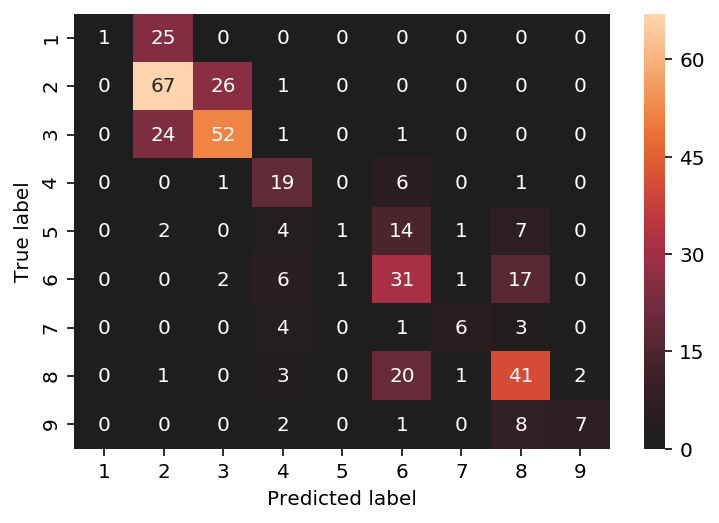

In [26]:
sns.heatmap(cm,annot=True, center=True,fmt='d',xticklabels=temp,yticklabels=temp)
plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.show()